In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/Users/Oliver/Library/Python/3.7/lib/python/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
ati = pd.read_csv('../data/atium.csv', index_col=0)
full_ati = pd.read_csv('../data/atium.csv', index_col=0)
ati = ati[ati.eye_flag != 3]
kics = ati.KIC.values

ati.drop(ati[ati.KIC == 6603624].index, inplace=True) # faulty
ati.drop(ati[ati.KIC == 8760414].index, inplace=True) # faulty & out of range feh
ati.drop(ati[ati.KIC == 8938364].index, inplace=True) # faulty
ati.drop(ati[ati.KIC == 6278762].index, inplace=True) # out of range age
ati.drop(ati[ati.KIC == 7106245].index, inplace=True) # out of range feh
print(len(ati))

89


## Inclination checks

In [3]:
full_ati['ideg'] = np.rad2deg(full_ati['i'])

In [4]:
full_ati[full_ati['ideg'] < 14]

,KIC,Teff,age,dnu,eTeff,ednu,efeh,enumax,feh,loage,...,l_P,P,u_P,l_vsini,vsini,u_vsini,rhat_flag,eye_flag,ebprp,ideg
15,6603624,5674,7.8234,110.128,77,0.012,0.1,5.4,0.28,0.8624,...,0.019086,1.218267,0.036713,0.664208,5.701380,0.641580,NaN,0,0.001042,6.893700
36,8760414,5873,11.6642,117.230,77,0.022,0.1,9.1,-0.92,1.6059,...,0.403788,2.004548,4.481342,1.878079,3.083780,1.152309,rhat_01,0,NaN,7.616282
37,8938364,5677,10.2508,85.684,77,0.018,0.1,5.2,-0.13,0.6548,...,0.199141,2.035735,86.970072,2.962227,3.613092,1.577381,rhat_1,1,0.000509,8.676839


In [5]:
 def epsilon(i, l, m):
    #I use the prescriptions from Gizon & Solank 2003 and Handberg & Campante 2012
        if l == 0:
            return 1
        if l == 1:
            if m == 0:
                return np.cos(i)**2
            if np.abs(m) == 1:
                return 0.5 * np.sin(i)**2
        if l == 2:
            if m == 0:
                return 0.25 * (3 * np.cos(i)**2 - 1)**2
            if np.abs(m) ==1:
                return (3/8)*np.sin(2*i)**2
            if np.abs(m) == 2:
                return (3/8) * np.sin(i)**4
        if l == 3:
            if m == 0:
                return (1/64)*(5*np.cos(3*i) + 3*np.cos(i))**2
            if np.abs(m) == 1:
                return (3/64)*(5*np.cos(2*i) + 3)**2 * np.sin(i)**2
            if np.abs(m) == 2:
                return (15/8) * np.cos(i)**2 * np.sin(i)**4
            if np.abs(m) == 3:
                return (5/16)*np.sin(i)**6

In [7]:
for idx in full_ati[full_ati['ideg'] < 20].index:
    ideg = full_ati.loc[idx].ideg
    i = full_ati.loc[idx].i
    print(f'Inclination: {ideg:.2f} deg')
    print(f'l=1: {epsilon(i, 1, -1):.2f} - {epsilon(i, 1, 0):.2f} - {epsilon(i, 1, 1):.2f}')
    print(f'l=2: {epsilon(i, 2, -2):.2f} - {epsilon(i, 2, -1):.2f} - {epsilon(i, 2, 0):.2f} - {epsilon(i, 2, 1):.2f} - {epsilon(i, 2, 2):.2f}')

Inclination: 6.89 deg
l=1: 0.01 - 0.99 - 0.01
l=2: 0.00 - 0.02 - 0.96 - 0.02 - 0.00
Inclination: 19.91 deg
l=1: 0.06 - 0.88 - 0.06
l=2: 0.01 - 0.15 - 0.68 - 0.15 - 0.01
Inclination: 7.62 deg
l=1: 0.01 - 0.98 - 0.01
l=2: 0.00 - 0.03 - 0.95 - 0.03 - 0.00
Inclination: 8.68 deg
l=1: 0.01 - 0.98 - 0.01
l=2: 0.00 - 0.03 - 0.93 - 0.03 - 0.00
Inclination: 16.62 deg
l=1: 0.04 - 0.92 - 0.04
l=2: 0.00 - 0.11 - 0.77 - 0.11 - 0.00


## Visibility Checks

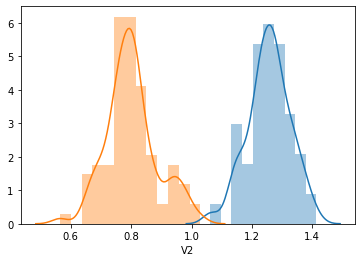

In [23]:
sns.distplot(full_ati.V1, label='V1')
sns.distplot(full_ati.V2, label='V2')

What were the metallicities of excluded stars?

In [3]:
excl = [6278762, 7106245, 8760414]

In [4]:
for kic in excl:
    print(full_ati[full_ati.KIC == kic][['KIC','age','feh']])

        KIC    age   feh
75  6278762  11.54 -0.37
        KIC     age   feh
19  7106245  6.2732 -0.99
        KIC      age   feh
36  8760414  11.6642 -0.92


Exclude stars and check counts

In [5]:
gyro

NameError: name 'gyro' is not defined

In [6]:
len(ati)

89

In [7]:
full_ati.rhat_flag.values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'rhat_01',
       'rhat_1', nan, nan, nan, 'rhat_01', nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       'rhat_01', 'rhat_1', nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, 'rhat_01', 'rhat_1', nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'rhat_01'],
      dtype=object)

In [8]:
len(ati[ati.neff_split < 1000])

16

In [9]:
gyro = ati[(ati.neff_split > 1000) & (ati.rhat_flag != 'rhat_1')]
print(f'Number of stars: {len(gyro)}')

print(f'Number of MS stars: {len(gyro[gyro.hrclass == "MS"])}')
print(f'Number of SG stars: {len(gyro[gyro.hrclass == "SG"])}')
print(f'Number of Hot stars: {len(gyro[gyro.hrclass == "H"])}')

Number of stars: 73
Number of MS stars: 47
Number of SG stars: 4
Number of Hot stars: 22


In [11]:
binaries = [8379927, 7510397, 110454113, 9025370]

In [18]:
gyro[gyro['KIC'].isin(binaries)][['KIC','age','P','Teff']]

,KIC,age,P,Teff
22,7510397,2.8247,6.127679,6171
32,8379927,1.9943,9.197603,6067
38,9025370,6.5458,24.708597,5270


In [9]:
ati.feh[np.abs(ati.feh)>0.4]

19   -0.99
27   -0.54
35   -0.42
36   -0.92
48   -0.44
Name: feh, dtype: float64

In [5]:
kics = [8379927, 7510397, 10454113, 9025370, 
        9139151, 9139163, 12069424, 12069449]

In [6]:
ati.loc[ati.KIC.isin(kics)][['KIC','hrclass']]

,KIC,hrclass
22,7510397,MS
32,8379927,MS
38,9025370,MS
40,9139151,H
41,9139163,H
52,10454113,MS
62,12069424,MS
63,12069449,MS


In [7]:
s = pd.read_hdf('../data/jvs_models/standard_population.h5', key='sample', mode='r')
r = pd.read_hdf('../data/jvs_models/rocrit_population.h5', key='sample', mode='r')

In [8]:
s.head(5)

,Teff,logg,age,log(L/Lsun),kepmag,period,[Fe/H],sdss_g,sdss_r,sdss_i,sdss_z,2mass_j,2mass_h,2mass_k,distmod,av
0,5674.121798,4.546360,2.344080,-0.183266,13.179899,16.514088,-0.25,13.608602,13.116370,12.989363,12.955900,12.057497,11.717930,11.673961,8.0,0.023
1,6951.708181,3.933103,1.075882,1.096682,11.543289,0.329513,0.25,11.675875,11.496100,11.518610,11.592506,10.864254,10.734087,10.707454,9.6,0.026
2,5469.331282,4.514284,4.397194,-0.201221,14.927321,26.007799,0.03,15.437877,14.854865,14.705988,14.656783,13.722554,13.350661,13.299497,9.7,0.028
3,6344.650025,3.894877,4.326163,0.779397,13.079468,4.449201,-0.37,13.318601,13.030315,12.978174,12.997246,12.189016,11.956218,11.925694,10.3,0.028
4,5900.870183,4.406368,2.860606,0.110336,14.923477,17.637126,0.11,15.312142,14.856574,14.758535,14.748767,13.884789,13.594818,13.555235,10.5,0.033


In [9]:
len(s)

148168

In [10]:
len(r)

149344

Check which stars fail the models and why

In [12]:
cols = ['Teff','period','age']
bound_s = [(s[par].min(), s[par].max()) for par in cols]
bound_ro = [(r[par].min(), r[par].max()) for par in cols]

In [13]:
print(bound_s)
print(bound_ro)

[(3425.9156265381794, 6999.9723642203635), (0.07317455558063757, 99.99122696777991), (0.021113455235250454, 8.510581875868573)]
[(3425.911842063402, 6999.992236222967), (0.01986124425753786, 99.97785357575125), (0.02089507655216875, 8.511068740474942)]


In [14]:
a = ati.loc[(ati.KIC == 11253226)]

In [15]:
b = ati.loc[ati.KIC == 6278762]

In [17]:
cols = ['Teff', 'P', 'age']
for idx, col in enumerate(cols):
    print(bound_s[idx])
    print(bound_ro[idx])
    print(f'11253226: {a[col].values}')
    print(f'6278762: {b[col].values}')

(3425.9156265381794, 6999.9723642203635)
(3425.911842063402, 6999.992236222967)
11253226: [6642]
6278762: [5046]
(0.07317455558063757, 99.99122696777991)
(0.01986124425753786, 99.97785357575125)
11253226: [3.42807917]
6278762: [32.97068814]
(0.021113455235250454, 8.510581875868573)
(0.02089507655216875, 8.511068740474942)
11253226: [1.5951]
6278762: [11.54]


In [15]:
ati.loc[ati.eye_flag == 3]

,KIC,Teff,age,dnu,eTeff,ednu,efeh,enumax,feh,loage,...,eV2,l_P,P,u_P,l_vsini,vsini,u_vsini,rhat_flag,eye_flag,ebprp
81,8478994,5417,5.35,178.7,75,1.4,0.07,50.0,-0.32,1.01,...,0.073275,0.888131,1.49014,0.504133,6.524018,26.061328,13.184462,rhat_1,3,0.000688


In [16]:
print(f'R 1.01: {len(ati.loc[ati.rhat_flag == "rhat_01"])}')
print(f'R 1.1: {len(ati.loc[ati.eye_flag != 3].loc[ati.rhat_flag == "rhat_1"])}')

R 1.01: 5
R 1.1: 2


In [17]:
ati.columns

Index(['KIC', 'Teff', 'age', 'dnu', 'eTeff', 'ednu', 'efeh', 'enumax', 'feh',
       'loage', 'lomodlogg', 'lomodmass', 'lomodrad', 'modlogg', 'modmass',
       'modrad', 'numax', 'source', 'upage', 'upmodlogg', 'upmodmass',
       'upmodrad', 'G', 'bprp', 'hrclass', 'neff_xsplit', 'neff_cosi',
       'neff_split', 'neff_i', 'l_nus*', 'nus*', 'u_nus*', 'l_cosi', 'cosi',
       'u_cosi', 'l_nus', 'nus', 'u_nus', 'l_i', 'i', 'u_i', 'fit_numax',
       'efit_numax', 'fit_d01', 'efit_d01', 'fit_d02', 'efit_d02',
       'fit_epsilon', 'efit_epsilon', 'V1', 'eV1', 'V2', 'eV2', 'l_P', 'P',
       'u_P', 'l_vsini', 'vsini', 'u_vsini', 'rhat_flag', 'eye_flag', 'ebprp'],
      dtype='object')

In [18]:
cols = ['KIC', 'Teff', 'eTeff', 'age','loage', 'upage', 'feh','efeh', 
        'modlogg', 'modmass','modrad', 'hrclass', 'P',
       'l_P', 'u_P', 'i', 'l_i', 'u_i', 'vsini', 'eye_flag']
a = pd.read_csv('../data/atium.csv',usecols=cols)

Check 16 cyg A & B

In [19]:
cyg =a.loc[[62, 63]]

In [20]:
cyg

,KIC,Teff,age,eTeff,efeh,feh,loage,modlogg,modmass,modrad,upage,hrclass,l_i,i,u_i,l_P,P,u_P,vsini,eye_flag
62,12069424,5825,6.6735,50,0.03,0.10,0.7666,4.2867,1.0491,1.2156,0.8145,MS,0.050879,0.780742,0.108518,1.114095,20.516716,1.975841,2.112675,2
63,12069449,5750,7.3922,50,0.02,0.05,0.9103,4.3527,0.9883,1.0957,0.8943,MS,0.041302,0.594267,0.051959,1.474881,21.178840,1.808344,1.462994,0


In [21]:
np.rad2deg(cyg['i'])

62    44.733243
63    34.048965
Name: i, dtype: float64

In [22]:
np.rad2deg(cyg['u_i'])

62    6.217602
63    2.977057
Name: u_i, dtype: float64

In [23]:
np.rad2deg(cyg['l_i'])

62    2.915159
63    2.366435
Name: l_i, dtype: float64

Check size of age systematics

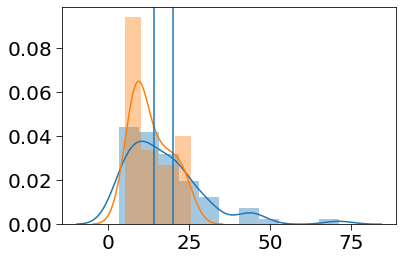

In [32]:
sns.distplot(100*ati[ati.source=='L'].upage/ati[ati.source=='L'].age)
sns.distplot(100*ati[ati.source=='K'].upage/ati[ati.source=='K'].age)

plt.axvline(14)
plt.axvline(20)

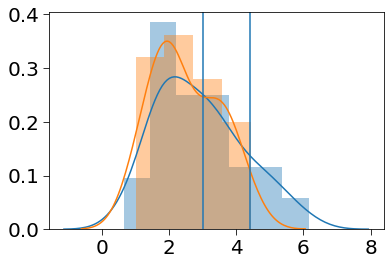

In [33]:
sns.distplot(100*ati[ati.source=='L'].upmodmass/ati[ati.source=='L'].modmass)
sns.distplot(100*ati[ati.source=='K'].upmodmass/ati[ati.source=='K'].modmass)

plt.axvline(3)
plt.axvline(4.4)

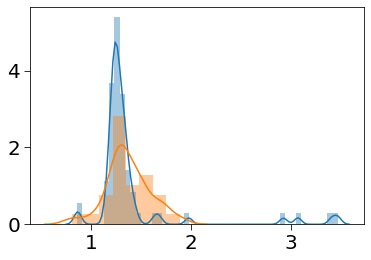

In [35]:
sns.distplot(100*ati[ati.source=='L'].eTeff/ati[ati.source=='L'].Teff)
sns.distplot(100*ati[ati.source=='K'].eTeff/ati[ati.source=='K'].Teff)